# Theory


### General Equations
$$ATP + Mfa \xrightarrow{Fae} Mfa^*$$  
$$Mfa^* \xrightarrow{Aap} Mfa$$  

$$\frac{d[ATP]}{dt} = - (k_1 + k_f [Fae])[Mfa][ATP] $$  
$$\frac{d[Mfa]}{dt} = - (k_1 + k_f [Fae])[Mfa][ATP] + (k_2+k_A [Aap])[Mfa^*]$$  

$$ \frac{d[Mfa]}{dt} = -\frac{d[Mfa^*]}{dt}$$  
$$ \implies Mfa + Mfa^* = Const$$  

### Mfa Steady State  
Assume $\frac{d[Mfa]}{dt}= 0$  
$$(k_1 + k_f [Fae])[Mfa][ATP]= (k_2+k_A [Aap])$$  
$$\frac{d[ATP]}{dt} = - (k_1 + k_f [Fae])[Mfa][ATP] $$  

with solution:  
$$ ATP(t) = [ATP_0] e^{-(k_1 + k_f [Fae])[Mfa] t} $$  
since $(k_1 + k_f [Fae])[Mfa] = Const$  

Suspect 44a with no catalysts has Mfa in steady state due to exponential dependence.  






# Loading data from the excel file

In [748]:
# from google.colab import drive
# drive.mount('/content/drive')

In [749]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

def extract_datasets_with_titles(df):
    """
    Extracts individual datasets from a DataFrame separated by rows containing 'x'
    and assigns dataset titles from the corresponding row.

    Args:
        df: The pandas DataFrame containing the data.

    Returns:
        A dictionary where keys are dataset titles and values are corresponding DataFrames.
    """
    datasets = {}

    # Store the dataset title
    x_indicies = []
    for index, row in df.iterrows():
        row_values = row.values
        # Check if row contains 'x', meaning it's a dataset separator
        if 'x' in str(row_values):
            x_indicies.append(index)


    for i, index in enumerate(x_indicies[:-1]):
        Title = df.iloc[index,1]
        T = df.iloc[index,2]

        # Save previous dataset (if exists)
        df_extracted = pd.DataFrame(df.iloc[index+1:x_indicies[i+1]])
        # print(df_extracted)
        df_extracted = df_extracted.dropna(axis=1, how='all').dropna(axis=0, how='all')  # Clean NaNs

        df_extracted.attrs['T'] = T
        df_extracted.attrs['Title'] = Title

        datasets[Title] = df_extracted  # Store dataset with its title

    Title = df.iloc[x_indicies[-1],1]
    T = df.iloc[x_indicies[-1],2]
    df_extracted = pd.DataFrame(df.iloc[x_indicies[-1]+1:])
    df_extracted = df_extracted.dropna(axis=1, how='all').dropna(axis=0, how='all')  # Clean NaNs
    df_extracted.attrs['T'] = T
    df_extracted.attrs['Title'] = Title
    datasets[Title] = df_extracted  # Store dataset with its title


    return datasets

In [750]:
# Load CSV file
datapath = 'data_new.csv'
df = pd.read_csv(datapath)

# Extract datasets with titles
datasets = extract_datasets_with_titles(df)

# Rename row indices
custom_row_names7 = ["Rep1", "Rep2", "Rep3", "Rep4", "MFA", "FAE", "AAP"]
custom_row_names6 = ["Rep1", "Rep2", "Rep3", "MFA", "FAE", "AAP"]

for title, dataset in datasets.items():
    if len(dataset) == 7:  # Ensure enough rows exist
        dataset.index = custom_row_names7[:len(dataset)]
        dataset = dataset.astype(float)
    if len(dataset) == 6:  # Ensure enough rows exist
        dataset.index = custom_row_names6[:len(dataset)]
        dataset = dataset.astype(float)

    last_rows = dataset.iloc[-3:]
    dataset.attrs['buffer_indicies'] = []

    for index, i in enumerate(last_rows.columns):
      if (last_rows[i] == 0).all():

        dataset.rename(columns={i: f'buffer {index}'}, inplace=True)
        dataset.attrs['buffer_indicies'] += [f'buffer {index}']
    datasets[title] = dataset

(datasets).keys()

dict_keys(['MFAmain', 'FAEmain', 'AAPmain', 'ALLmain', 'MFAsup1', 'MFAsup2', 'MFAsup3', 'FAEsup1', 'FAEsup2', 'FAEsup3', 'AAPsup1', 'AAPsup2', 'AAPsup3'])

In [751]:
# find mean, std, ... and add to table
def add_stats(title):
  data = datasets[title]
  rep_rows = data.loc[data.index.str.contains("Rep")]
  data.loc["mean"] = rep_rows.mean()
  data.loc["std"] = rep_rows.std()
  data.loc["rsm"] = data.loc["std"]/len(rep_rows)**0.5

  #find mean... for all buffer measuremets
  # create df of only buffere data
  buffer_columns = data.columns[data.columns.str.contains("buffer")]
  buf_cols = data[buffer_columns]
  rep_rows = buf_cols.loc[buf_cols.index.str.contains("Rep")]
  #then find quants
  buf_mean = rep_rows.values.mean()
  buf_std = rep_rows.values.std()
  buf_SE = rep_rows.values.std()/(rep_rows.values.size**0.5)
  #save to overall df metadata
  data.attrs["buffer"] = {"mean":buf_mean, "std":buf_std, "SE":buf_SE}
  data.loc['norm_mean'] = data.loc['mean']/buf_mean

#add the nam,e of the independent varieable
variables = {'MFAmain':'MFA',
             'FAEmain':'FAE',
             'AAPmain':'AAP',
             'ALLmain':'multi',
             'MFAsup1':'MFA',
             'MFAsup2':'MFA',
             'MFAsup3':'MFA',
             'FAEsup1':'FAE',
             'FAEsup2':'FAE',
             'FAEsup3':'FAE',
             'AAPsup1':'AAP',
             'AAPsup2':'AAP',
             'AAPsup3':'AAP'}
for title in datasets.keys():
    dataset = datasets[title]
    datasets[title].attrs['variable'] = variables[title]

for title in datasets.keys():
  add_stats(title)


In [752]:
# Display datasets with titles
from IPython.display import display
for title, dataset in datasets.items():
    print(f"Dataset Title: {title}")
    if 0: #Set to 1 to show
      display(dataset)
      print("-"*40)

Dataset Title: MFAmain
Dataset Title: FAEmain
Dataset Title: AAPmain
Dataset Title: ALLmain
Dataset Title: MFAsup1
Dataset Title: MFAsup2
Dataset Title: MFAsup3
Dataset Title: FAEsup1
Dataset Title: FAEsup2
Dataset Title: FAEsup3
Dataset Title: AAPsup1
Dataset Title: AAPsup2
Dataset Title: AAPsup3


# Analysing Data

### My plotting functions

In [753]:
# plotting functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from scipy.optimize import curve_fit

nicecolors = ["royalblue", "darkorange", "limegreen", "purple", "teal", "gold", "fuchsia", "maroon", "gray", "black"]

def plot_scatter(ax, x, y, label=None, color="royalblue", marker=None, alpha=0.7):
    """
    Plots a scatter plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the scatter plot. Defaults to None.
        color (str, optional): The color of the scatter plot. Defaults to "royalblue".
    """
    label = f'{label}' if label else None
    # Plot data
    sns.scatterplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha)
    sns.despine(ax=ax)

def plot_line(ax, x, y, label=None, color="royalblue", marker=None, alpha=0.7):
    """
    Plots a line plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the line plot. Defaults to None.
        color (str, optional): The color of the line plot. Defaults to "royalblue".
        marker (str, optional): The marker style for the line plot. Defaults to None.
    """
    label = f'{label}' if label else None
    # Plot data
    sns.lineplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha)
    sns.despine(ax=ax)

def plot_data(ax, x, y, label=None, color="royalblue", marker='o', alpha=0.7):
    """
    Plots a line plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the line plot. Defaults to None.
        color (str, optional): The color of the line plot. Defaults to "royalblue".
        marker (str, optional): The marker style for the line plot. Defaults to None.
    """
    label = f'{label}' if label else None
    # Plot data
    sns.lineplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha)
    sns.despine(ax=ax)

def plot_labels(ax, xlabel='', ylabel='', title='', fts=16):
    """
    Sets the labels and title of the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes to modify.
        xlabel (str, optional): The label for the x-axis. Defaults to ''.
        ylabel (str, optional): The label for the y-axis. Defaults to ''.
        title (str, optional): The title of the plot. Defaults to ''.
        fts (int, optional): The font size for the labels and title. Defaults to 16.
    """
    # Labels and title
    ax.set_xlabel(xlabel, fontsize=fts)
    ax.set_ylabel(ylabel, fontsize=fts)
    ax.set_title(title, fontsize=fts)

def plot_fit(ax, x, y, fit_func, color=None, linestyle=None, label=None, p0=None):
    """
    Fits a curve to the data and plots the fit on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        fit_func (callable): The function to use for fitting.
        color (str, optional): The color of the fit line. Defaults to None.
        linestyle (str, optional): The linestyle of the fit line. Defaults to None.
        label (str or callable, optional): The label for the fit line. If callable,
          it will be called with the fit parameters. Defaults to None.

    Returns:
        tuple: A tuple containing the fit parameters, covariance matrix, and R^2 value.
    """
    # Fit curve
    popt, popc = curve_fit(fit_func, x, y, p0=p0)

    if callable(label):
        label = label(*popt)
    spread = max(x) - min(x)
    xfit = np.linspace(min(x) - spread, max(x) + spread, 1000)
    y_fit = fit_func(xfit, *popt)
    label = f'{label}' if label else None
    sns.lineplot(ax=ax, x=xfit, y=y_fit, label=label, color=color, linestyle=linestyle, alpha=0.7)

    # Compute R^2
    ss_res = np.sum((y - fit_func(x, *popt)) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    R2 = 1 - (ss_res / ss_tot)
    print(f'Fit parameters: {popt}', f' R^2: {R2}')
    return popt, popc, R2

def plot_lims(ax, x, y, xlims=['d', 'd'], ylims=['d', 'd']):
    """
    Sets the limits of the x and y axes.

    Args:
        ax (matplotlib.axes.Axes): The axes to modify.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        xlims (list, optional): The limits for the x-axis. 'd' indicates default limits. Defaults to ['d', 'd'].
        ylims (list, optional): The limits for the y-axis. 'd' indicates default limits. Defaults to ['d', 'd'].
    """
    span = lambda x: max(x) - min(x)
    if ylims:
        if ylims[0] == 'd':
            ylims[0] = min(y) - span(y) * 0.05
        if ylims[1] == 'd':
            ylims[1] = max(y) + span(y) * 0.05
        ax.set_ylim(ylims)
    if xlims:
        if xlims[0] == 'd':
            xlims[0] = min(x) - span(x) * 0.05
        if xlims[1] == 'd':
            xlims[1] = max(x) + span(x) * 0.05
        ax.set_xlim(xlims)

def plot_ticks(ax,fts =12, x_ticks=None, y_ticks=None, x_scale=None, y_scale=None, default_ticks=5):
    """
    Adjusts the ticks of a matplotlib axis to look nicer, with improved tick value selection.

    Args:
        ax (matplotlib.axes.Axes): The axis to adjust.
        x_ticks (int or list, optional): Number of x-axis ticks or explicit tick positions.
        y_ticks (int or list, optional): Number of y-axis ticks or explicit tick positions.
        x_scale (str, optional): Scaling of the x-axis ('linear', 'log', etc.).
        y_scale (str, optional): Scaling of the y-axis ('linear', 'log', etc.).
        default_ticks (int, optional): The default number of ticks if x_ticks or y_ticks are not provided.
    """

    if x_ticks is None:
        if x_scale == 'log':
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=default_ticks))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=default_ticks, integer=False))  # changed to MaxNLocator
    elif isinstance(x_ticks, int):
        if x_scale == 'log':
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=x_ticks))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=x_ticks, integer=False))  # changed to MaxNLocator
    else:
        ax.set_xticks(x_ticks)

    if y_ticks is None:
        if y_scale == 'log':
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=default_ticks))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=default_ticks, integer=False))  # changed to MaxNLocator
    elif isinstance(y_ticks, int):
        if y_scale == 'log':
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=y_ticks))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=y_ticks, integer=False))  # changed to MaxNLocator
    else:
        ax.set_yticks(y_ticks)

    if x_scale == 'log':
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    if y_scale == 'log':
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='both', which='both', direction='out')
    ax.tick_params(axis='both', which='major', length=5)
    ax.tick_params(axis='both', which='minor', length=2.5)

    if x_scale == 'log':
        ax.xaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
    if y_scale == 'log':
        ax.yaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
    if x_scale == 'linear':
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    if y_scale == 'linear':
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    ax.tick_params(axis='x', labelsize=fts)
    ax.tick_params(axis='y', labelsize=fts)

def plot_legend(ax, legfts=12, loc=None, remove=[]):
    """
    Adds a legend to the given axis with optional customization.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to add the legend to.
    legfts (int, optional): Font size of the legend. Defaults to 12.
    loc (str or int, optional): Location of the legend. Uses Matplotlib's legend location codes. Defaults to None.
    remove (list, optional): List of indices of legend items to exclude. Defaults to an empty list.

    Returns:
    None
    """
    handles, labels = ax.get_legend_handles_labels()
    nlabels = [item for i, item in enumerate(labels) if i not in remove]
    nhandles = [item for i, item in enumerate(handles) if i not in remove]
    ax.legend(handles=nhandles, labels=nlabels, fontsize=legfts, loc=loc)


def plot_show(fig,ax, save_path=None):
    """
    Adjusts the layout of the figure and either displays or saves it.

    Parameters:
    fig (matplotlib.figure.Figure): The figure to display or save.
    save_path (str, optional): File path to save the figure. If None, the figure is shown instead. Defaults to None.

    Returns:
    None
    """
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    fig.show()


# fitting lambda functions
exp_fit = lambda x, a, b: a* np.exp( b * x)
exp_label = lambda a, b: f"$y = {a:.2f} e^{{{b:.2f} x}}$"

exp_fitC = lambda x, a, b, c: a* np.exp( b * x) + c
expC_label = lambda a, b, c: f"$y = {a:.2f} e^{{{b:.2f} x}} + {c:.2f}$"

linear_fit = lambda x, a, b: a*x + b
linear_label = lambda a, b: f"$y = {a:.2f}x+ {b:.2f}$"

quad_fit = lambda x, a, b, c: a*x**2 + b*x +c
quad_label = lambda a, b, c: f"$y = {a:.2f}x^2 + {b:.2f}x+c$"


### Basic plot with fit for single experiment

Fit parameters: [ 0.89661009 -2.20240684]  R^2: 0.8797463962752563
Fit parameters: [-1.46536527  0.88445786]  R^2: 0.9301699976725877
Fit parameters: [-2.66684888 -0.53196817  0.83778801]  R^2: 0.9609782728946344


/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_9441/479999845.py:232: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



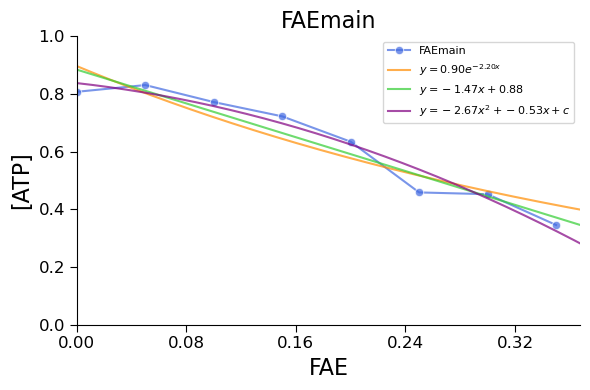

In [754]:
fig, ax = plt.subplots(figsize=(6, 4))

dataset = datasets['FAEmain'] #choose dataset to explore
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(None,None) #to remove certain indicies of data e.g 1st
x = data.loc[data.attrs['variable']][slicer] # the indepvariable (conc varried)
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer


plot_data(ax, x, y, label=f"{data.attrs.get('Title')}", color=nicecolors[0])

# some different fits
popt, popc, R2 = plot_fit(ax, x, y, exp_fit, label = exp_label, color=nicecolors[1])
popt, popc, R2 = plot_fit(ax, x, y, linear_fit, label = linear_label, color=nicecolors[2])
popt, popc, R2 = plot_fit(ax, x, y, quad_fit, label = quad_label, color=nicecolors[3])

plot_labels(ax, x.name, '[ATP]', f"{data.attrs.get('Title')}")
# ax.legend().set_visible(False) #seaborn always adds axis
plot_legend(ax, legfts = 8) #remove=[1,3,5,7] remove fit labels from legend
plot_lims(ax, x, y, [0,'d'],[0,1.]) #set lims to max of all points ('d' is default)
plot_ticks(ax) #make ticks nicer
plot_show(fig, ax)

### Plot all experiments in list

Fit parameters: [ 1.23598889 -0.21206623]  R^2: 0.9960762845841071
Fit parameters: [ 1.25426129 -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 1.59503997 -0.46061181]  R^2: 0.9936896313523752
Fit parameters: [ 1.88979417 -0.7136051 ]  R^2: 0.9893299234720907


/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_9441/479999845.py:232: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



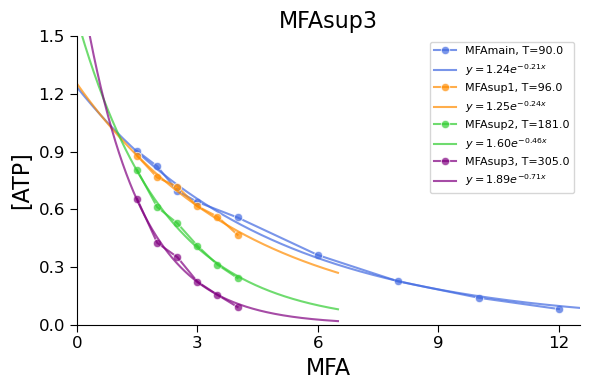

In [755]:
#plot the basic plot for all datasets in a list for comparisson
fig, ax = plt.subplots(figsize=(6, 4))
i=0
allx = []
ally = []
for title in ['MFAmain','MFAsup1','MFAsup2','MFAsup3']:
  dataset = datasets[title]
  buffer_indices = dataset.attrs.get('buffer_indicies', [])
  data = dataset.drop(columns=buffer_indices) #get only data values not buffer
  if data.attrs['variable'] != 'multi':
    x = data.loc[data.attrs['variable']]
    y = data.loc["norm_mean"] #luminosity normed by avg buffer


    plot_data(ax, x, y, label=f"{data.attrs.get('Title')}, T={data.attrs['T']}", color=nicecolors[i])

    popt, popc, R2 = plot_fit(ax, x, y, exp_fit, label = exp_label, color=nicecolors[i])
    plot_labels(ax, x.name,'[ATP]', f"{data.attrs.get('Title')}")
    # ax.legend().set_visible(False) #seaborn always adds axis

    i+=1
    #make sure limits include all points
    allx += x.tolist()
    ally += y.tolist()
plot_legend(ax, legfts = 8) #remove=[1,3,5,7] remove fit labels from legend
plot_lims(ax, allx, ally, [0,'d'],[0,1.5]) #set lims to max of all points
plot_ticks(ax) #make ticks nicer
plot_show(fig, ax)

### plot allsup data sets whoch are actaully just  FFA and AAP sets merged
probably should permantly seperate

# Simulation

## Dimesnsionless Sims

$$a = [ATP]/[ATP_0]$$
$$m = [MFA]/[MFA_0]$$

$$\lambda_0 = k_1 + k_f [FAE]$$
$$\gamma_0 = k_2 + k_a [AAP]$$
$$ \beta = \gamma / \lambda$$
$$ \alpha = [ATP_0]/ [MFA_0]$$

$$\tau = t \lambda_0$$
$$ \frac{da}{d\tau}= -ma$$
$$ \frac{dm}{d\tau}= -\alpha ma + \beta (1-m)$$


In [756]:
from scipy.integrate import solve_ivp

class simulation:
    """
    A class to simulate the kinetics of a biochemical reaction system involving ATP MFA, and MFA*.

    Attributes:
        rates (dict): Dictionary of rate constants for the reactions.
        concs (dict): Dictionary of initial concentrations for species.
        indepvar (str): Name of the independent variable for parameter sweep (conc that changes).
        var_concs (list): List of concentration values to iterate over during simulation.
        results (list): Stores simulation outputs for each parameter value.
    """

    def __init__(self, concs, rates):
        """
        Initialize the simulation with initial concentrations, rate constants, and an independent variable.

        Args:
            concs (dict): Initial concentrations of species.
            rates (dict): Reaction rate constants (intrinsic and catalyzed).
            indepvar (str): The variable whose values will be varied during simulations.
        """
        # the stoch sims just use the dicts
        self.concs = concs
        self.rates = rates
        # other sims use idiviual vars for each component/rate
        self.a = 1
        self.m = 1
        self.m_star = 0

        self.alpha = rates['alpha']
        self.gamma = rates['gamma']
        self.lambd = rates['lambda']

        self.results = []

    def reaction_system(self, t, y):
        """
        Defines the system of ODEs for the reaction kinetics.

        Args:
            t (float): Time variable (not used, required by solver).
            y (list): Current concentrations of ATP, MFA, and MFA_star.

        Returns:
            list: Derivatives of concentrations.
        """
        a, m = y
 
        da_dtau = -  a * m
        dm_dtau = - self.alpha * m * a + self.gamma / self.lambd * (1 - m)

        return [da_dtau, dm_dtau]

    def simulate(self):
        """
        Run a deterministic simulation using the ODE model and store the ATP trajectory.
        """
        t_max = sim.T +20
        tau = lambda t: t * self.lambd
        time_span = (0, tau(t_max))
        self.time_eval = np.linspace(0, tau(t_max), 200)
        sol = solve_ivp(self.reaction_system, time_span, [self.a, self.m], t_eval=self.time_eval)
        self.results.append({'time': sol.t, 'ATP': sol.y[0]})

    def sim_over_var(self):
        """
        Run deterministic simulations over a range of values for the independent variable.
        """
        for c in self.var_concs:
            # this sets the e.g. self.'MFA' to c
            setattr(self, self.indepvar, c)
            # simulate
            self.simulate()

    def sim_over_two_vars(self, var1, var2, var1_vals, var2_vals, t_max=60):
        """
        Run deterministic simulations over all combinations of two independent variables.

        Args:
            var1 (str): Name of the first variable (e.g. 'FAE').
            var2 (str): Name of the second variable (e.g. 'AAP').
            var1_vals (list or array): Values to iterate for var1.
            var2_vals (list or array): Values to iterate for var2.
            t_max (float): Simulation end time.
        """
        # Clear/Reset
        self.results_2D = []

        # We'll create a 2D list (or list of lists) to store results
        for v1 in var1_vals:
            row_results = []
            for v2 in var2_vals:
                # Set the attribute values
                setattr(self, var1, v1)
                setattr(self, var2, v2)

                # Also reset self.results if you only want the "latest" result each time
                self.results = []
                # Run the simulation (if it uses the current self.<var1>, self.<var2>)
                self.simulate(t_max=t_max)

                # Store just the last result
                sim_result = self.results[-1]  # dictionary with 'time' and 'ATP'
                # You could store other info if needed
                row_results.append({
                    var1: v1,
                    var2: v2,
                    'time': sim_result['time'],
                    'ATP': sim_result['ATP']
                })

            self.results_2D.append(row_results)

    def interpolate(self, T):
        """
        Interpolate ATP concentration at a specific time point `T` for each simulation result.

        Args:
            T (float): The time point at which ATP concentration is interpolated.
        """
        Tmes = []
        for sol in self.results:
            Tmes.append(np.interp(T, sol['time'], sol['ATP']))
        self.Tmes = np.array(Tmes)

    def Stoch_Sim(self):
        """
        Run a stochastic simulation using Gillespie SSA and normalize ATP concentrations.
        """
        model = MFASimulation(self, self.rates)
        solver = gillespy.SSACSolver(model)
        sol = solver.run(number_of_trajectories=1)
        # sol[0]['ATP'] /= self.concs['ATP']
        self.results.append(sol)

    def Stoch_sim_over_var(self, rates_list):
        """
        Run stochastic simulations across a range of values for the independent variable.
        """
        for rates in tqdm(rates_list):
            # this sets the conc e.g. self.'MFA' to c
            self.rates = rates
            #scale conc for discrete system
            self.Stoch_Sim()

    def timeseries_plots(self):
        #plot time series results
        fig, ax = plt.subplots(figsize=(6, 4))
        plot_data(ax, [],[])
        for sol in self.results:
          plt.plot(sol['time'], sol['ATP'] , color=nicecolors[0])
        plot_labels(ax, "time", "[ATP]", f"{indepvar} kinetics")
        plot_lims(ax, sol['time'], sol['ATP'], [0,'d'],[0,'d'])
        plot_ticks(ax)
        plt.show()

    def data_vs_sim_plot(self,shift=0):
        # plot data and simdata
        fig, ax = plt.subplots(figsize=(6, 4))
        shift = 0
        plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"data with x=x{shift}", color=nicecolors[0],marker='o')
        plot_scatter(ax, (self.var_concs), (self.Tmes), label='sim', color=nicecolors[1], marker='x')

        #fit exponetial and shift
        popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, label = exp_label, color=nicecolors[0])
        popt, popc, R2 = plot_fit(ax, (self.var_concs), (self.Tmes), exp_fit, label = exp_label, color=nicecolors[1])

        plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics")
        plot_lims(ax, sim.x, self.Tmes, [0,'d'],[0,1])
        plot_ticks(ax)
        plt.show()

    def sim_over_two_vars(self, var1, var2,
                          var1_vals, var2_vals,
                          t_max=60, n_points=200):
        """
        Sweeps var1 × var2 and returns a 2‑D list of results.
        result[i][j] corresponds to var1_vals[i], var2_vals[j]
        """
        grid = []
        for v1 in var1_vals:
            row = []
            for v2 in var2_vals:
                res = self._run_once({var1: v1, var2: v2},
                                    t_max=t_max, n_points=n_points)
                row.append(res)
            grid.append(row)
        return grid          # DON’T store internally unless you want to
    def _run_once(self, conc_updates, t_max=60, n_points=200):
        """
        conc_updates : dict  - {'AAP':0.5, 'FAE':2.0, ...}
        Returns      : dict  - {'time':..., 'ATP':..., **conc_updates}
        """
        # 1. copy ORIGINAL concentrations so we don’t mutate self.concs
        y0_concs = self.concs.copy()
        y0_concs.update(conc_updates)     # patch with the current grid point

        # 2. unpack to local attributes used in reaction_system
        self.AAP = y0_concs['AAP']
        self.FAE = y0_concs['FAE']
        self.MFA = y0_concs['MFA']
        self.MFA_star = y0_concs['MFA_star0']
        self.ATP = y0_concs['ATP']

        # 3. integrate
        t_eval = np.linspace(0, t_max, n_points)
        sol = solve_ivp(self.reaction_system, (0, t_max),
                        [self.ATP, self.MFA, self.MFA_star],
                        t_eval=t_eval)

        return {'time': sol.t,
                'ATP':  sol.y[0] / self.concs['ATP'],
                **conc_updates}


# dataset loading
def load_dataset(name):
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data
    indepvar = dataset.attrs['variable']
    buffer_indices = dataset.attrs.get('buffer_indicies', [])
    data = dataset.drop(columns=buffer_indices) #get only data values not buffer
    slicer = slice(None,None) #can be used to remove certain values
    # reminder x usually goes from hight to low in data!
    x = data.loc[indepvar][slicer]
    y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
    T = data.attrs['T']
    return x, y, indepvar, T
def load_dataset_v2(name): # new version of load_dataset that can load ALLmain, TBD:
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data

    indepvar = dataset.attrs['variable']
    if indepvar != 'multi':
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      # reminder x usually goes from hight to low in data!
      x = data.loc[indepvar][slicer]
      y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
      T = data.attrs['T']
      return x, y, indepvar, T
    else: # actually works only for the AAP and FAE case in allmain but that's what we care for
      indepvar1 = 'AAP'
      indepvar2 = 'FAE'
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      x1 = dataset.loc[indepvar1]
      x2 = dataset.loc[indepvar2]
      y = dataset.loc["norm_mean"] #luminosity normed by avg buffer
      T = dataset.attrs['T']
      return x1, x2, y, indepvar1, indepvar2, T



KeyboardInterrupt: 

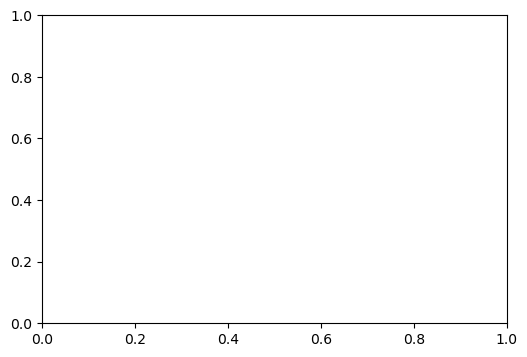

In [757]:
sets = {}
# define rates and concerntraions
rates = {'k1_0': 0.002426 , 'k1_c': 0.03, 'k2_0': 10000.1, 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

def find_dim_rates(concs, krates):

    alpha = concs['ATP']#/concs['MFA']
    gamma = krates['k2_0'] + krates['k2_c'] * concs['AAP']
    lambd = (krates['k1_0'] + krates['k1_c'] * concs['FAE']) * concs['MFA']
    rates = {'alpha': alpha, 'gamma': gamma, 'lambda': lambd}
    return rates

for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']): #

    fig, ax = plt.subplots(figsize=(6, 4))

    sims = []
    shift = -1
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    x = x.to_numpy() + shift
    # set the [enzyme] which is varried to array of what it is
    rate_list = []
    for ix in x:
        concs[indepvar] =  ix
        rate_list.append(find_dim_rates(concs, krates))
    for rates in rate_list:
        sim = simulation(concs, rates)
        sim.T = T
        sim.simulate()
        sim.interpolate(T)
        sims.append(sim)
    mesurements = [sim.Tmes[0] for sim in sims]
    if title == 'MFAmain':
        plot_scatter(ax,  x, y, label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i])
        plot_scatter(ax, x, mesurements, label='sim',marker='o', color=nicecolors[i])

        #fit exponetial and shift
        popt, popc, R2 = plot_fit(ax, x, y, exp_fit, color=nicecolors[i], label = exp_label)
        popt, popc, R2 = plot_fit(ax, x, mesurements, exp_fit, color=nicecolors[i], label = exp_label, linestyle='--')

        plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics") #T={sim.T}
        plot_lims(ax, x, mesurements, [0,'d'],[0,1])
        plot_ticks(ax)
        plot_legend(ax, legfts = 8, loc='right')
        plt.show()
    sets[title] = mesurements
    plt.close()

Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 0.99723907 -0.26289187]  R^2: 0.9999960295938046
Fit parameters: [ 0.990097   -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 0.99844881 -0.27840946]  R^2: 0.999997112710139
Fit parameters: [ 1.00630678 -0.4606118 ]  R^2: 0.9936896313523746
Fit parameters: [ 0.998269   -0.48367137]  R^2: 0.9999990068904904
Fit parameters: [ 0.92576284 -0.7136051 ]  R^2: 0.9893299234720905
Fit parameters: [ 0.99835766 -0.78385044]  R^2: 0.999999792494323
k_1 = 0.00243 ± 0.00008
k_1 sim = 0.00277 ± 0.00015


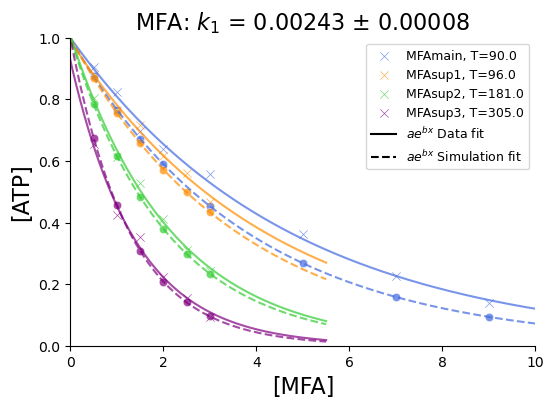

In [ ]:
keff_data = []
keff_sim = []

fig, ax = plt.subplots(figsize=(6, 4))
for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']):

    shift = -1
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    x = x.to_numpy() + shift

    mesurements = sets[title]

    plot_scatter(ax,  x, y, label=f"{title}, T={T}", marker='x', color=nicecolors[i])
    plot_scatter(ax, x, mesurements, label=None,marker='o', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, x, y, exp_fit, color=nicecolors[i], label = None)
    keff_data.append(popt[1]/T)
    popt, popc, R2 = plot_fit(ax, x, mesurements, exp_fit, color=nicecolors[i], label = None, linestyle='--')
    keff_sim.append(popt[1]/T)
    plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, x, mesurements, [0,10],[0,1])
    

plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 9, loc='upper right')
keff = np.array(keff_data)
print(f"k_1 = {-keff.mean():.5f} ± {keff.std():.5f}")
plt.title(f"MFA: $k_1$ = {-keff.mean():.5f} ± {keff.std():.5f}", fontsize=16)

keff = np.array(keff_sim)
print(f"k_1 sim = {-keff.mean():.5f} ± {keff.std():.5f}")
name = 'MFAsup_plot'
# plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

## Simulation class

In [1198]:
from scipy.integrate import solve_ivp

class simulation:
    """
    A class to simulate the kinetics of a biochemical reaction system involving ATP MFA, and MFA*.

    Attributes:
        rates (dict): Dictionary of rate constants for the reactions.
        concs (dict): Dictionary of initial concentrations for species.
        indepvar (str): Name of the independent variable for parameter sweep (conc that changes).
        var_concs (list): List of concentration values to iterate over during simulation.
        results (list): Stores simulation outputs for each parameter value.
    """

    def __init__(self, concs, rates, indepvar):
        """
        Initialize the simulation with initial concentrations, rate constants, and an independent variable.

        Args:
            concs (dict): Initial concentrations of species.
            rates (dict): Reaction rate constants (intrinsic and catalyzed).
            indepvar (str): The variable whose values will be varied during simulations.
        """
        # the stoch sims just use the dicts
        self.concs = concs
        self.rates = rates
        # other sims use idiviual vars for each component/rate
        self.k1_0 = rates['k1_0']
        self.k1_c = rates['k1_c']
        self.k2_0 = rates['k2_0']
        self.k2_c = rates['k2_c']

        self.ATP = concs['ATP']
        self.MFA_star = concs['MFA_star0']
        self.MFA = concs['MFA']
        self.FAE = concs['FAE']
        self.AAP = concs['AAP']

        self.indepvar = indepvar
        self.var_concs = self.__getattribute__(indepvar)
        self.results = []

    def reaction_system(self, t, y):
        """
        Defines the system of ODEs for the reaction kinetics.

        Args:
            t (float): Time variable (not used, required by solver).
            y (list): Current concentrations of ATP, MFA, and MFA_star.

        Returns:
            list: Derivatives of concentrations.
        """
        ATP, MFA, MFA_star = y

        rate1 = (self.k1_0 + self.k1_c * self.FAE) * ATP * MFA
        rate2 = (self.k2_0 + self.k2_c * self.AAP) * MFA_star

        dATP_dt = -rate1
        dMFA_dt = -rate1 + rate2
        dMFA_star_dt = rate1 - rate2

        return [dATP_dt, dMFA_dt, dMFA_star_dt]
    def reaction_system(self, t, y):
        ATP, MFA, MFA_star = y
        # n= 4
        # KD = .2
        # Hill-based cooperative effect of FAE
        hill_effectFAE = (self.FAE**F_n) / (F_KD**F_n + self.FAE**F_n)
        hill_effectAAP = self.AAP #(self.AAP**A_n) / (A_KD**n + self.AAP**A_n)

        # Updated rate with cooperative catalyst activity
        rate1 = (self.k1_0 + self.k1_c * hill_effectFAE) * ATP * MFA
        rate2 = (self.k2_0 + self.k2_c * hill_effectAAP) * MFA_star

        dATP_dt = -rate1
        dMFA_dt = -rate1 + rate2
        dMFA_star_dt = rate1 - rate2

        return [dATP_dt, dMFA_dt, dMFA_star_dt]

    def simulate(self):
        """
        Run a deterministic simulation using the ODE model and store the ATP trajectory.
        """
        t_max = sim.T +20
        time_span = (0, t_max)
        self.time_eval = np.linspace(0, t_max, 200)
        sol = solve_ivp(self.reaction_system, time_span, [self.ATP, self.MFA, self.MFA_star], t_eval=self.time_eval)
        self.results.append({'time': sol.t, 'ATP': sol.y[0]/self.concs['ATP']})

    def sim_over_var(self):
        """
        Run deterministic simulations over a range of values for the independent variable.
        """
        for c in self.var_concs:
            # this sets the e.g. self.'MFA' to c
            setattr(self, self.indepvar, c)
            # simulate
            self.simulate()

    def sim_over_two_vars(self, var1, var2, var1_vals, var2_vals, t_max=60):
        """
        Run deterministic simulations over all combinations of two independent variables.

        Args:
            var1 (str): Name of the first variable (e.g. 'FAE').
            var2 (str): Name of the second variable (e.g. 'AAP').
            var1_vals (list or array): Values to iterate for var1.
            var2_vals (list or array): Values to iterate for var2.
            t_max (float): Simulation end time.
        """
        # Clear/Reset
        self.results_2D = []

        # We'll create a 2D list (or list of lists) to store results
        for v1 in var1_vals:
            row_results = []
            for v2 in var2_vals:
                # Set the attribute values
                setattr(self, var1, v1)
                setattr(self, var2, v2)

                # Also reset self.results if you only want the "latest" result each time
                self.results = []
                # Run the simulation (if it uses the current self.<var1>, self.<var2>)
                self.simulate(t_max=t_max)

                # Store just the last result
                sim_result = self.results[-1]  # dictionary with 'time' and 'ATP'
                # You could store other info if needed
                row_results.append({
                    var1: v1,
                    var2: v2,
                    'time': sim_result['time'],
                    'ATP': sim_result['ATP']
                })

            self.results_2D.append(row_results)

    def interpolate(self, T):
        """
        Interpolate ATP concentration at a specific time point `T` for each simulation result.

        Args:
            T (float): The time point at which ATP concentration is interpolated.
        """
        Tmes = []
        for sol in self.results:
            Tmes.append(np.interp(T, sol['time'], sol['ATP']))
        self.Tmes = np.array(Tmes)

    def Stoch_Sim(self):
        """
        Run a stochastic simulation using Gillespie SSA and normalize ATP concentrations.
        """
        model = MFASimulation(self.concs, self.rates, indepvar=self.indepvar)
        solver = gillespy.SSACSolver(model)
        sol = solver.run(number_of_trajectories=1)
        sol[0]['ATP'] /= self.concs['ATP']
        self.results.append(sol)

    def Stoch_sim_over_var(self):
        """
        Run stochastic simulations across a range of values for the independent variable.
        """
        for c in tqdm(self.var_concs):
            # this sets the conc e.g. self.'MFA' to c
            setattr(self, self.indepvar, c) #not nessasry
            #scale conc for discrete system
            self.concs[self.indepvar] = c  #needs scaling !find better solution
            self.Stoch_Sim()

    def timeseries_plots(self):
        #plot time series results
        fig, ax = plt.subplots(figsize=(6, 4))
        plot_data(ax, [],[])
        for sol in self.results:
          plt.plot(sol['time'], sol['ATP'] , color=nicecolors[0])
        plot_labels(ax, "time", "[ATP]", f"{indepvar} kinetics")
        plot_lims(ax, sol['time'], sol['ATP'], [0,'d'],[0,'d'])
        plot_ticks(ax)
        plt.show()

    def data_vs_sim_plot(self,shift=0):
        # plot data and simdata
        fig, ax = plt.subplots(figsize=(6, 4))
        shift = 0
        plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"data with x=x{shift}", color=nicecolors[0],marker='o')
        plot_scatter(ax, (self.var_concs), (self.Tmes), label='sim', color=nicecolors[1], marker='x')

        #fit exponetial and shift
        popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, label = exp_label, color=nicecolors[0])
        popt, popc, R2 = plot_fit(ax, (self.var_concs), (self.Tmes), exp_fit, label = exp_label, color=nicecolors[1])

        plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics")
        plot_lims(ax, sim.x, self.Tmes, [0,'d'],[0,1])
        plot_ticks(ax)
        plt.show()

    def sim_over_two_vars(self, var1, var2,
                          var1_vals, var2_vals,
                          t_max=60, n_points=200):
        """
        Sweeps var1 × var2 and returns a 2‑D list of results.
        result[i][j] corresponds to var1_vals[i], var2_vals[j]
        """
        grid = []
        for v1 in var1_vals:
            row = []
            for v2 in var2_vals:
                res = self._run_once({var1: v1, var2: v2},
                                    t_max=t_max, n_points=n_points)
                row.append(res)
            grid.append(row)
        return grid          # DON’T store internally unless you want to
    def _run_once(self, conc_updates, t_max=60, n_points=200):
        """
        conc_updates : dict  – {'AAP':0.5, 'FAE':2.0, ...}
        Returns      : dict  – {'time':..., 'ATP':..., **conc_updates}
        """
        # 1. copy ORIGINAL concentrations so we don’t mutate self.concs
        y0_concs = self.concs.copy()
        y0_concs.update(conc_updates)     # patch with the current grid point

        # 2. unpack to local attributes used in reaction_system
        self.AAP = y0_concs['AAP']
        self.FAE = y0_concs['FAE']
        self.MFA = y0_concs['MFA']
        self.MFA_star = y0_concs['MFA_star0']
        self.ATP = y0_concs['ATP']

        # 3. integrate
        t_eval = np.linspace(0, t_max, n_points)
        sol = solve_ivp(self.reaction_system, (0, t_max),
                        [self.ATP, self.MFA, self.MFA_star],
                        t_eval=t_eval)

        return {'time': sol.t,
                'ATP':  sol.y[0] / self.concs['ATP'],
                **conc_updates}


# dataset loading
def load_dataset(name):
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data
    indepvar = dataset.attrs['variable']
    buffer_indices = dataset.attrs.get('buffer_indicies', [])
    data = dataset.drop(columns=buffer_indices) #get only data values not buffer
    slicer = slice(None,None) #can be used to remove certain values
    # reminder x usually goes from hight to low in data!
    x = data.loc[indepvar][slicer]
    y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
    T = data.attrs['T']
    return x, y, indepvar, T
def load_dataset_v2(name): # new version of load_dataset that can load ALLmain, TBD:
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data

    indepvar = dataset.attrs['variable']
    if indepvar != 'multi':
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      # reminder x usually goes from hight to low in data!
      x = data.loc[indepvar][slicer]
      y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
      T = data.attrs['T']
      return x, y, indepvar, T
    else: # actually works only for the AAP and FAE case in allmain but that's what we care for
      indepvar1 = 'AAP'
      indepvar2 = 'FAE'
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      x1 = dataset.loc[indepvar1]
      x2 = dataset.loc[indepvar2]
      y = dataset.loc["norm_mean"] #luminosity normed by avg buffer
      T = dataset.attrs['T']
      return x1, x2, y, indepvar1, indepvar2, T



## simulation executions

In [1122]:
sims = {}
# define rates and concerntraions
rates = {'k1_0': 0.002426 , 'k1_c': 0.03, 'k2_0': 100.1, 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

# rates = {'k1_0': 1.5 * .22428/90 , 'k1_c': 0.03, 'k2_0': 10, 'k2_c': 20}
# concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 2.0, 'FAE': 0.0, 'AAP': 0.0}

for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']):

    fig, ax = plt.subplots(figsize=(6, 4))
    shift = -1
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    
    plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i])
    plot_scatter(ax, (sim.var_concs), (sim.Tmes), label='sim',marker='o', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, color=nicecolors[i], label = exp_label)
    popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, color=nicecolors[i], label = exp_label, linestyle='--')

    plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1])
    plot_ticks(ax)
    plot_legend(ax, legfts = 8, loc='right')
    plt.close()
    sims[title] = sim

Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 1.00242269 -0.2125412 ]  R^2: 0.9999750458198018
Fit parameters: [ 0.990097   -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 1.00073849 -0.22470282]  R^2: 0.9999892662482339
Fit parameters: [ 1.00630678 -0.4606118 ]  R^2: 0.9936896313523746
Fit parameters: [ 1.00145509 -0.42600329]  R^2: 0.9999777728108933
Fit parameters: [ 0.92576284 -0.7136051 ]  R^2: 0.9893299234720905
Fit parameters: [ 1.00173936 -0.72045556]  R^2: 0.9999710602586018


Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 1.00242269 -0.2125412 ]  R^2: 0.9999750458198018
Fit parameters: [ 0.990097   -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 1.00073849 -0.22470282]  R^2: 0.9999892662482339
Fit parameters: [ 1.00630678 -0.4606118 ]  R^2: 0.9936896313523746
Fit parameters: [ 1.00145509 -0.42600329]  R^2: 0.9999777728108933
Fit parameters: [ 0.92576284 -0.7136051 ]  R^2: 0.9893299234720905
Fit parameters: [ 1.00173936 -0.72045556]  R^2: 0.9999710602586018
k_1 = 0.00243 ± 0.00008


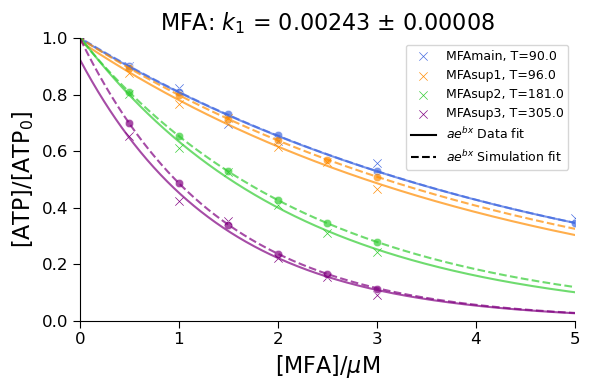

In [1123]:
keff = []
fig, ax = plt.subplots(figsize=(6, 4))
for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']):
    sim = sims[title]
    shift = -1
    plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='o', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, color=nicecolors[i], label = None)
    keff.append(popt[1]/sim.T)
    popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,5],[0,1])
    plot_ticks(ax)
    
    sims[title] = sim
plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 9, loc='upper right')
keff = np.array(keff)
print(f"k_1 = {-keff.mean():.5f} ± {keff.std():.5f}")
plt.title(f"MFA: $k_1$ = {-keff.mean():.5f} ± {keff.std():.5f}", fontsize=16)
name = 'MFAsup_plot'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

In [1275]:
sims = {}
# define rates and concerntraions
rates = {'k1_0': 1*0.002426 , 'k1_c': 0.02, 'k2_0': 50., 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

# rates = {'k1_0': 0.5*0.002426 , 'k1_c': 0.02, 'k2_0': 10, 'k2_c': 0.0}
# concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 2.0, 'FAE': 0.0, 'AAP': 0.0}

F_KD = 0.35
F_n = 4
for i, title in enumerate(['FAEmain','FAEsup1','FAEsup2','FAEsup3']):

    shift = 0
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    sims[title] = sim

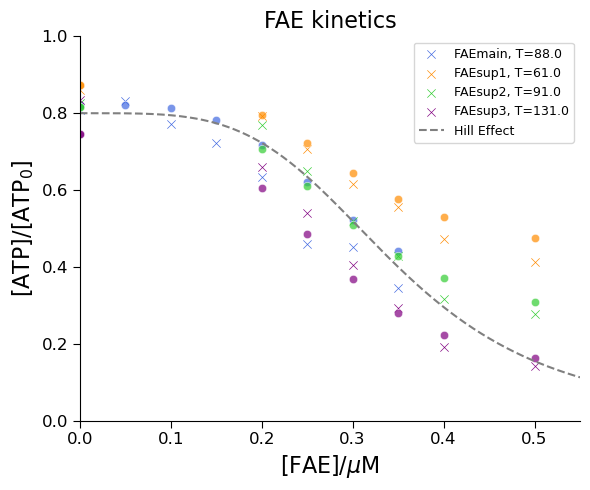

In [1276]:
keff = []
fig, ax = plt.subplots(figsize=(6, 5))
for i, title in enumerate(['FAEmain','FAEsup1','FAEsup2','FAEsup3']): #'FAEmain',
    sim = sims[title]
    shift = 0
    plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='o', color=nicecolors[i])

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, color=nicecolors[i], label = None)
    # popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,0.55],[0,1])
    
    
    sims[title] = sim
plot_ticks(ax, default_ticks=6)
# plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
# plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')

lin = np.linspace(0, 0.55, 1000)
plt.plot(lin, 0.8*(1-lin**n /(lin**n + KD**n)), color='grey', linestyle='--', label = 'Hill Effect')
plot_legend(ax, legfts = 9, loc='upper right')

name = 'MFAsup_plot'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

In [ ]:
sims = {}
# define rates and concerntraions
rates = {'k1_0': 1.5 * .22428/90 , 'k1_c': 0.03, 'k2_0': 1.5, 'k2_c': 20}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 2.0, 'FAE': 0.0, 'AAP': 0.0}

rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.03, 'k2_0': 3.5, 'k2_c': 25}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

F_KD = 0.35
F_n = 4

for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']):

    shift = 0
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    if title == 'AAPmain':
            x = x[1:]
            y = y[1:]
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    sims[title] = sim

0.6575078021942665
0.8594606667957175
0.8269859237558714
0.8349732407681665


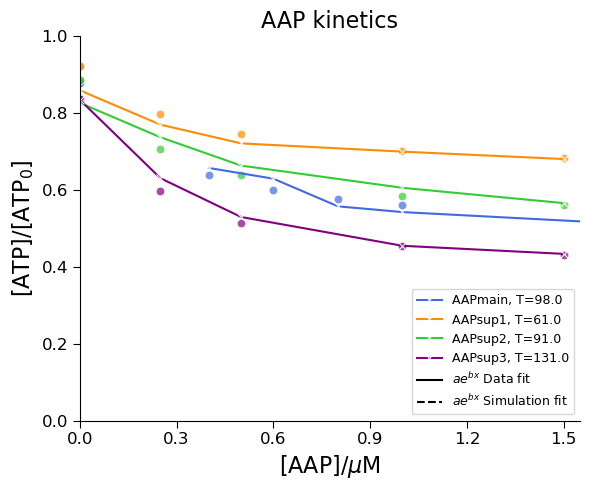

In [1308]:
keff = []
fig, ax = plt.subplots(figsize=(6, 5))
for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']): #,
    sim = sims[title]
    shift = 0

    plot_data(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='o', color=nicecolors[i])
    exp_fitC = lambda x, a, b: a * np.exp(b * x) + sim.y.min() #exp_fit
    print(sim.y.max())
    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fitC, color=nicecolors[i], label = None)
    exp_fitC = lambda x, a, b: a * np.exp(b * x) + sim.Tmes.min() #exp_fit
    # popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fitC, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,1.55],[0,1])
    
    
    sims[title] = sim
plot_ticks(ax, default_ticks=6)
plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 9, loc='lower right')
name = 'MFAsup_plot'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

In [916]:
ar = np.array([0.8594606667957175, 0.8269859237558714, 0.8349732407681665])
ar.mean(), ar.std()
print(f"ar = {ar.mean():.5f} ± {ar.std():.5f}")

ar = 0.84047 ± 0.01382


### only 1 indep var

## 2 uncopled independent variables


In [1333]:
# @title 2 uncopled independent variables
#Initiation of parameters:

rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.04, 'k2_0': 3.5, 'k2_c': 25}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches AAP


rates = {'k1_0': 1. * .22428/90 , 'k1_c': 0.04, 'k2_0': 50, 'k2_c': 20}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches FAE

rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.4, 'k2_0': 10, 'k2_c': 25}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches both?

F_KD = 0.35
F_n = 4
# load dataset of interest
x1, x2, y, indepvar1, indepvar2, T = load_dataset_v2('ALLmain')

sim = simulation(concs, rates, indepvar='FAE')   # name ignored here
grid = sim.sim_over_two_vars(indepvar1, indepvar2,
                             x1, x2,
                             t_max=T)

# quick heat‑map of ATP remaining at t = T
ATP90 = np.array([[cell['ATP'][-1] for cell in row] for row in grid])

x2_mesh, x1_mesh = np.meshgrid(x2, x1)  # note the order for axes



In [1349]:
import plotly.graph_objects as go
import numpy as np

# x1, x2, ATP90 are 2D arrays
x2_mesh, x1_mesh = np.meshgrid(x2, x1)

# Flatten all arrays for scatter plot
x_vals = x1_mesh.flatten()  # [FAE] (µM)
y_vals = x2_mesh.flatten()  # [AAP] (µM)
z_vals = ATP90.flatten()    # [ATP]/[ATP]₀ at 90 s

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_vals,
    y=y_vals,
    z=z_vals,
    name = 'Simulation',
    mode='markers',
    marker=dict(
        size=4,
        color=nicecolors[0],  # Color by ATP90 value
        opacity=0.8
    )
)])

# Add another trace without overwriting the original
fig.add_trace(go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    name = 'Data',
    mode='markers',
    marker=dict(
        size=4,
        color=nicecolors[1],  # Color by ATP90 value
        opacity=0.8
    )
))


# Update layout for better visualization
fig.update_layout(
    title = title,
    scene=dict(
        xaxis_title=f'[{indepvar1}] (µM)',
        yaxis_title=f'[{indepvar2}] (µM)',
        zaxis_title='[ATP] / [ATP]₀',
        aspectmode='cube',
        
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Remove extra padding
)

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=1.5, y=1.5, z=.5)
)

fig.update_layout(scene_camera=camera)
fig.update_traces(textfont=dict(size=18))
fig.write_image("3Dpahse.svg")  # Increase scale for higher resolution

fig.show()

# Stochastic Simulations


## gillespy2 reaction system

In [1147]:
import gillespy2 as gillespy
import numpy as np
import matplotlib.pyplot as plt

class MFASimulation(gillespy.Model):
    def __init__(self, concs, rates, indepvar):
        super().__init__('MFA_Reaction')

        # Parameters (rate constants)
        self.k1_0 = gillespy.Parameter(name='k1_0', expression=rates['k1_0'])
        self.k1_c = gillespy.Parameter(name='k1_c', expression=rates['k1_c'])
        self.k2_0 = gillespy.Parameter(name='k2_0', expression=rates['k2_0'])
        self.k2_c = gillespy.Parameter(name='k2_c', expression=rates['k2_c'])
        self.add_parameter([self.k1_0, self.k1_c, self.k2_0, self.k2_c])


        # Species (concentrations)
        self.ATP = gillespy.Species(name='ATP', initial_value=concs['ATP'])
        self.MFA = gillespy.Species(name='MFA', initial_value=concs['MFA'])
        self.MFA_star = gillespy.Species(name='MFA_star', initial_value=concs['MFA_star0'])
        self.FAE = gillespy.Species(name='FAE', initial_value=concs['FAE'])
        self.AAP = gillespy.Species(name='AAP', initial_value=concs['AAP'])

        self.add_species([self.ATP, self.MFA, self.MFA_star, self.FAE, self.AAP])

        # Define reactions with propensity functions as strings and valid names
        reaction1 = gillespy.Reaction(
            name='ATP_MFA_to_MFA_star',  # Changed to a valid name
            reactants={self.ATP: 1, self.MFA: 1, self.FAE: 1},  # if FAE binds catalytically
            products={self.MFA_star: 1, self.FAE: 1},  # FAE is released (unchanged)    
            propensity_function="(k1_0 + k1_c * FAE) * ATP * MFA"
    )
        

        reaction2 = gillespy.Reaction(
            name='MFA_star_to_MFA',  # Changed to a valid name
            reactants={self.MFA_star: 1, self.AAP: 1}, 
            products={self.MFA: 1, self.AAP: 1},  # AAP is released (unchanged)
            propensity_function="(k2_0 + k2_c * AAP) * MFA_star"
        )

        self.add_reaction([reaction1, reaction2])

        # Time span for simulation
        self.timespan(np.linspace(0, 100, 100))



## sims

In [ ]:
simsstoch = {}

In [ ]:
# load data
dataset = datasets['MFAmain']
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(None,None)
x = data.loc[indepvar][slicer] -1
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer

def units_coversion(conc, V):
  NA = 6.022e23 #avagadro mol^-1
  # conc = 1e-6 #1 micro molar = mol/ litre
  n = conc*NA # molecules / litre
  # V = 1e-15 # 1 pico liter
  N = n * V
  return(np.round(N)) #round to integer


# Running the Simulation
V = 1e-14 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}
rates = {'k1_0': 0.00243/units_coversion(1e-6 , V) , 'k1_c': 0.03, 'k2_0': 10000.1, 'k2_c': 0.0}

concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V)
sim = simulation(concs, rates, indepvar)
sim.Stoch_sim_over_var()
sim.interpolate(90)
sim.x = x; sim.y = y; sim.T = T
simsstoch['MFAmain'] = sim

100%|██████████| 9/9 [00:33<00:00,  3.74s/it]


Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 0.99997559 -0.21866105]  R^2: 0.9999998517709936


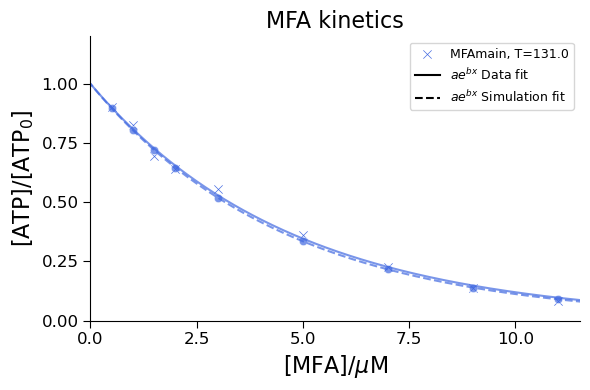

In [1151]:
# define rates and concerntraions
rates = {'k1_0': 0.22/90 , 'k1_c': 0.03, 'k2_0': 1000.1, 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}
fig, ax = plt.subplots(figsize=(6, 4))
for i, title in enumerate(['MFAmain']):



    sim = simsstoch[title]
    # datasets[title].attrs['sim'] = sim
    # plots of enzyme behavoit
    # sim.timeseries_plots() # each line is for different [enzyme]: [ATP] vs t
    # sim.data_vs_sim_plot(shift=0) #[ATP] at t=T vs [enzyme]
    # plot data and simdata
    shift = 0
    plot_scatter(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, sim.x, (sim.Tmes),marker='o', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[i], label = None)
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fit, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1.2])
    plot_ticks(ax)




plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 9, loc='upper right')
name = 'MFAsup_plot'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

## FAE

100%|██████████| 8/8 [00:23<00:00,  2.91s/it]


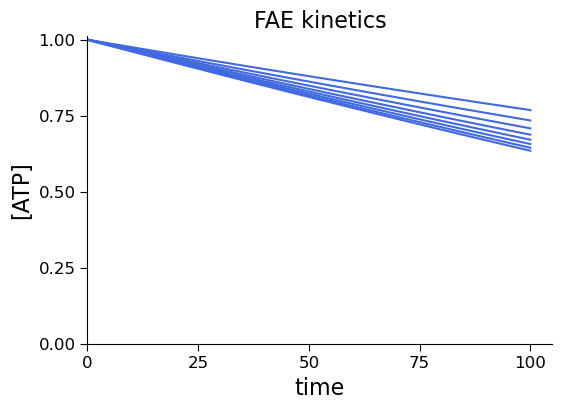

In [1162]:
simsstochF = {}
# define rates and concerntraions
# Running the Simulation
V = 1e-14 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}
rates = {'k1_0': 0.00243/units_coversion(1e-6 , V) , 'k1_c': 0.033/units_coversion(1e-6 , V)**2,
          'k2_0': 100.1, 'k2_c': 0.0/units_coversion(1e-6 , V)}
rates = {'k1_0': 2*0.00243/units_coversion(1e-6 , V) , 'k1_c': 0.033/units_coversion(1e-6 , V)**2,
          'k2_0': 10.1, 'k2_c': 10.0/units_coversion(1e-6 , V)} #work with 1microM MFA

for i, title in enumerate(['FAEmain']):

    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V) #dont convert Fae as its not 
    sim = simulation(concs, rates, indepvar)
    sim.x = x; sim.y = y; sim.T = T
    sim.Stoch_sim_over_var()
    sim.interpolate(sim.T)
    sim.timeseries_plots()
    simsstochF[title] = sim

Fit parameters: [-2.45636255  0.08154077]  R^2: 0.8703343778477497
Fit parameters: [-0.45061005 -0.01194551]  R^2: 0.9672594617849346


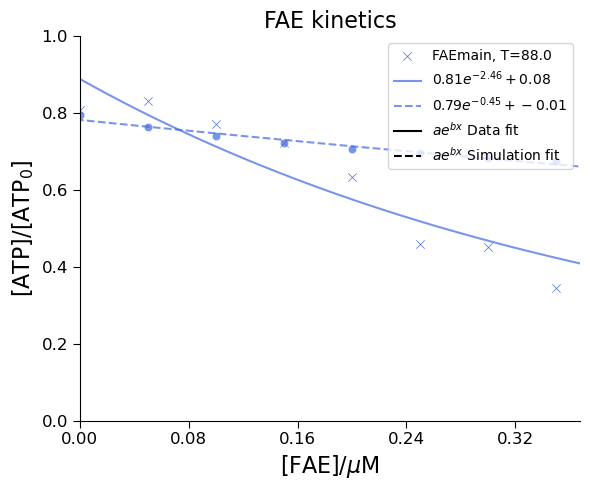

In [1163]:
fig, ax = plt.subplots(figsize=(6, 5))
for i, title in enumerate(['FAEmain']):

    sim = simsstochF[title]


    plot_scatter(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, sim.x, (sim.Tmes),marker='o', color=nicecolors[i])

    #fit exponetial and shift
    A = sim.y[0]
    exp_fitC = lambda x, b, c: A * np.exp(b * x) + c
    expC_label = lambda b, c: f"${A:.2f}e^{{{b:.2f}}} + {c:.2f}$"
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fitC, color=nicecolors[i], label = expC_label)
    A = sim.Tmes[0]
    exp_fitC = lambda x, b, c: A * np.exp(b * x) + c
    expC_label = lambda b, c: f"${A:.2f}e^{{{b:.2f}}} + {c:.2f}$"
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fitC, color=nicecolors[i], label = expC_label, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1])
    plot_ticks(ax)

plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 10, loc='upper right')
name = 'MFAsup_plot_stoch'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

100%|██████████| 9/9 [00:19<00:00,  2.14s/it]


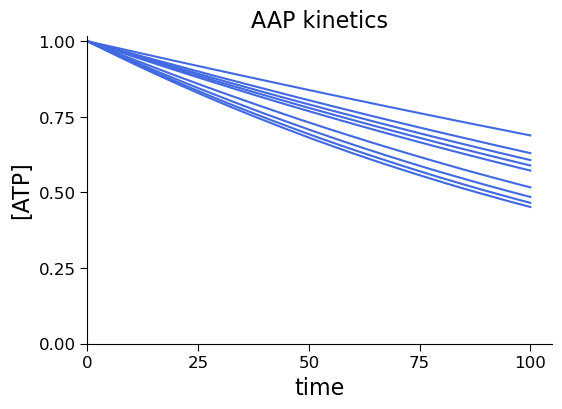

In [1154]:
simsstochA = {}
# define rates and concerntraions
# Running the Simulation
V = 1e-15 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}

rates = {'k1_0': 4*0.00243/units_coversion(1e-6 , V) , 'k1_c': 0.033/units_coversion(1e-6 , V)**2,
          'k2_0': 10.1, 'k2_c': 10.0/units_coversion(1e-6 , V)} #work with 1microM MFA
# rates = {'k1_0': 2*0.00243/units_coversion(1e-6 , V) , 'k1_c': 0.033/units_coversion(1e-6 , V)**2,
#           'k2_0': 10.1, 'k2_c': 20.0/units_coversion(1e-6 , V)}


for i, title in enumerate(['AAPmain']):

    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V)
    sim = simulation(concs, rates, indepvar)
    sim.x = x; sim.y = y; sim.T = T
    sim.Stoch_sim_over_var()
    sim.interpolate(sim.T)
    sim.timeseries_plots() # each line is for different [enzyme]: [ATP] vs t

    simsstochA[title] = sim

Fit parameters: [ 0.64709818 -0.08754318]  R^2: 0.7927245996015576
Fit parameters: [ 0.65143614 -0.08282911]  R^2: 0.915134519467789


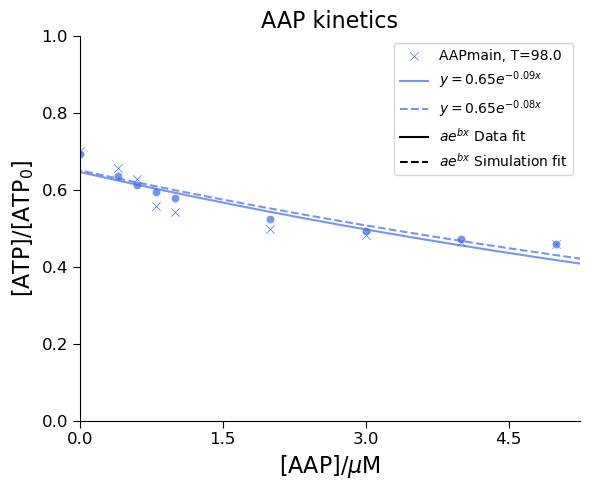

In [1155]:
fig, ax = plt.subplots(figsize=(6, 5))
for i, title in enumerate(['AAPmain']):

    sim = simsstochA[title]


    plot_scatter(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", marker='x', color=nicecolors[i], alpha=1)
    plot_scatter(ax, sim.x, (sim.Tmes),marker='o', color=nicecolors[i])

    #fit exponetial and shift
    A = sim.y[0]
    exp_fitC = lambda x, b, c: (A) * np.exp(b * x) + c
    expC_label = lambda b, c: f"${A:.2f}e^{{{b:.2f}}} + {c:.2f}$"
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[i], label = exp_label)
    A = sim.Tmes[0]
    exp_fitC = lambda x, b, c: (A) * np.exp(b * x) + c
    expC_label = lambda b, c: f"${A:.2f}e^{{{b:.2f}}} + {c:.2f}$"
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fit, color=nicecolors[i], label = exp_label, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1])
    plot_ticks(ax)

plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plot_legend(ax, legfts = 10, loc='upper right')
name = 'MFAsup_plot_stoch'
plt.tight_layout()
# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.svg', dpi=1000)

### michales mentewn

Fit parameters: [1.26218106 0.79219882]  R^2: 0.9990608984130512


/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_9441/1112808234.py:11: RuntimeWarning:

invalid value encountered in power



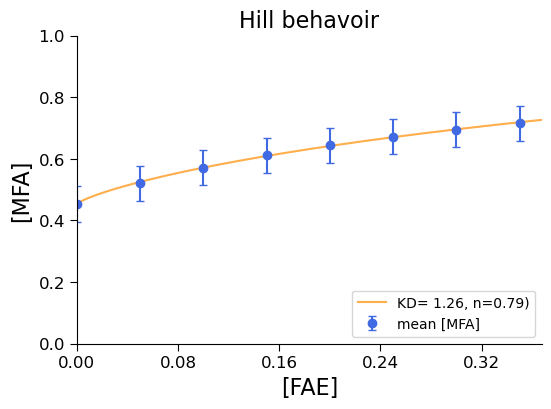

In [1169]:
# Plot results
xconc = []
yconc = []
fig, ax = plt.subplots(figsize=(6, 4))
for i, trajectory in enumerate(sim.results):
    # plt.plot(trajectory['time'], trajectory['MFA'],label=sim.var_concs[i], alpha=0.3)
    xconc.append(sim.var_concs[i]/units_coversion(1e-6 , V))
    yconc.append(trajectory['MFA_star'].mean()/concs['MFA'])
    errors = trajectory['MFA'].std()/concs['MFA']
xconc = np.array(xconc); yconc = np.array(yconc)
hill = lambda L, K_A, n: L**n/(L**n+ K_A**n) + yconc.min()
hill_label = lambda K_A, n: f"KD= {K_A:.2f}, n={n:.2f})"
plot_scatter(ax, xconc, yconc, color=nicecolors[0], marker='o')
plt.errorbar(xconc, yconc, yerr=errors, fmt='o', capsize=3,color=nicecolors[0], label='mean [MFA]')

popt, popc, R2 = plot_fit(ax, xconc, yconc, hill, label=hill_label,color=nicecolors[1])
plot_lims(ax, xconc, yconc, [0,'d'],[0,1])
plot_labels(ax, f'[{sim.indepvar}]', "[MFA]", "Hill behavoir")
plot_ticks(ax, default_ticks=6)
plot_legend(ax, legfts = 10, loc='lower right')


# temp bin

In [ ]:
import gillespy2 as gillespy
import numpy as np

class MFASimulation(gillespy.Model):
    def __init__(self, sim, rates):
        super().__init__(name='Dimensionless_MFA_Model')

        # Dimensionless parameters
        self.alpha = gillespy.Parameter(name='alpha', expression=rates['alpha'])  
        self.gamma = gillespy.Parameter(name='gamma', expression=rates['gamma'])
        self.lambd = gillespy.Parameter(name='lambd', expression=rates['lambda'])

        self.add_parameter([self.alpha, self.gamma, self.lambd])

        # Species (ATP: a, MFA: m, MFA*: m_star)
        self.a = gillespy.Species(name='a', initial_value=sim.a)  # ATP
        self.m = gillespy.Species(name='m', initial_value=sim.m)  # MFA
        self.m_star = gillespy.Species(name='m_star', initial_value=1-sim.m)  # MFA*

        self.add_species([self.a, self.m, self.m_star])

        # Reactions
        consumption = gillespy.Reaction(
            name='ATP consumption',
            reactants={self.a: 1, self.m: 1},
            products={self.m_star: 1},
            propensity_function="alpha * a * m"
        )

        reactivation = gillespy.Reaction(
            name='reactivation',
            reactants={self.m_star: 1},
            products={self.m: 1},
            propensity_function="(gamma / lambd) * m_star"
        )

        self.add_reaction([consumption, reactivation])

        # Timespan for simulation
        self.timespan(np.linspace(0, 100, 100))
simsstoch = {}
# load data
dataset = datasets['MFAmain']
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(None,None)
x = data.loc[indepvar][slicer] -1
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer

def units_coversion(conc, V):
  NA = 6.022e23 #avagadro mol^-1
  # conc = 1e-6 #1 micro molar = mol/ litre
  n = conc*NA # molecules / litre
  # V = 1e-15 # 1 pico liter
  N = n * V
  return(N)


# Running the Simulation
V = 1e-15 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}
rates = {'k1_0': 0.0003, 'k1_c': 0.05, 'k2_0': 1000, 'k2_c': 0.1}
rates = {'k1_0': 0.00243/10 , 'k1_c': 0.03, 'k2_0': 1000.1, 'k2_c': 0.0}

concs[indepvar] = x.to_numpy()[2:4]-1
sim = simulation(concs, rate_list[0])
sim.Stoch_sim_over_var(rate_list)
sim.interpolate(90)
sim.x = x; sim.y = y; sim.T = T
simsstoch['MFAmain'] = sim
import gillespy2 as gillespy
import numpy as np
import matplotlib.pyplot as plt

class MFADimensionlessSim(gillespy.Model):
    def __init__(self, concs, rates, scaling=1000):
        super().__init__(name='Dimensionless_MFA_Model')

        # Parameters (dimensionless, so not scaled)
        self.alpha = gillespy.Parameter(name='alpha', expression=rates['alpha'])
        self.gamma = gillespy.Parameter(name='gamma', expression=rates['gamma'])
        self.lambd = gillespy.Parameter(name='lambd', expression=rates['lambda'])
        self.add_parameter([self.alpha, self.gamma, self.lambd])

        # Convert dimensionless concs to molecule counts using scaling
        self.a = gillespy.Species(name='a', initial_value=int(concs['a'] * scaling))
        self.m = gillespy.Species(name='m', initial_value=int(concs['m'] * scaling))
        self.m_star = gillespy.Species(name='m_star', initial_value=int(concs['m_star'] * scaling))
        self.add_species([self.a, self.m, self.m_star])

        # Reactions
        activation = gillespy.Reaction(
            name='activation',
            reactants={self.a: 1, self.m: 1},
            products={self.m_star: 1},
            propensity_function = "(1 / {}) * a * m".format(scaling)
        )

        deactivation = gillespy.Reaction(
            name='deactivation',
            reactants={self.m_star: 1},
            products={self.m: 1},
            propensity_function="(gamma / lambd) * m_star"
        )

        self.add_reaction([activation, deactivation])

        # Simulation in dimensionless time τ
        self.timespan(np.linspace(0, 100, 200))


# --- Run simulation ---

rates = {'k1_0': 0.002426 , 'k1_c': 0.0, 'k2_0': 100, 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

def find_dim_rates(concs, krates):

    alpha = concs['ATP']/concs['MFA']
    gamma = krates['k2_0'] + krates['k2_c'] * concs['AAP']
    lambd = (krates['k1_0'] + krates['k1_c'] * concs['FAE']) * concs['MFA']
    rates = {'alpha': alpha, 'gamma': gamma, 'lambda': lambd}
    return rates

rates = find_dim_rates(concs, rates)
scaling =2  # Scaling factor for converting to molecule counts
concs = {
    'a': 1.0,  # ATP
    'm': 1.0,  # MFA
    'm_star': 0.0,  # MFA*
}
model = MFADimensionlessSim(concs, rates, scaling=scaling)
results = model.run(number_of_trajectories=1)

# Extract and plot ATP (a) trajectory
time = results[0].data['time']  # convert to dimensionless time
ATP_traj = results[0].data['a'] / scaling  # convert back to dimensionless conc.

plt.plot(time, ATP_traj, label='[ATP]')
plt.plot(time, results[0].data['m'] / scaling , label='[m]')

plt.xlabel('Dimensionless time (τ)')
plt.ylabel('Dimensionless [ATP]')
plt.title('Stochastic Simulation (Gillespie)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# define rates and concerntraions
disc_scale = 10 #scale things up a bit as its a discrete sim

rates = {'k1_0':  0.22428/90/disc_scale, 'k1_c': 0.05, 'k2_0': 500, 'k2_c': 0.1}
concs = {'ATP': 2000*disc_scale, 'MFA': 4*disc_scale, 'MFA_star0': 0, 'FAE': 0, 'AAP':0}

# load dataset of interest
x, y, indepvar, T = load_dataset('MFAmain')
# set the [enzyme] which is varried to array of what it is
concs[indepvar] = x.to_numpy() - 1

# simulation class containing everthing to do with sim
sim = simulation(concs, rates, indepvar) # initialise
sim.x = x; sim.y = y; sim.T = T # add the data to it
sim.Stoch_sim_over_var(disc_scale) # sim over variable [enzyme]
sim.interpolate(sim.T) # interpolate to find value at specific T



## unwrapped code

In [ ]:
#full code for changes
dataset = datasets['MFAmain'] # load data
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(None,None)
x = data.loc[indepvar][slicer]
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer

rates = {'k1_0': 0.22428/90 , 'k1_c': 0.0, 'k2_0': 0.1, 'k2_c': 0.0}
concs = {'ATP': 1.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

concs[indepvar] = x.to_numpy()
sim = simulation(concs, rates, indepvar)
sim.sim_over_var()
sim.interpolate(90)

#plot time series results
fig, ax = plt.subplots(figsize=(6, 4))
plot_data(ax, [],[])
for sol in sim.results:
  plt.plot(sol['time'], sol['ATP'] , color=nicecolors[0])
plot_labels(ax, "time", "[ATP]", f"{indepvar} kinetics")
plot_lims(ax, sol['time'], sol['ATP'], [0,'d'],[0,'d'])
plot_ticks(ax)
plt.close()

# plot data vs simdata
fig, ax = plt.subplots(figsize=(6, 4))
shift = 0
plot_data(ax,  (x+shift), (y), label=f"data with x=x{shift}", color=nicecolors[0])
plot_data(ax, (sim.var_concs), (sim.Tmes), label='sim', color=nicecolors[1])

#fit exponetial and shift if needed
popt, popc, R2 = plot_fit(ax, (x+shift), (y), exp_fit, label = exp_label, color=nicecolors[0])
popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, label = exp_label, color=nicecolors[1])

plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics")
plot_lims(ax, x, sim.Tmes, [0,'d'],[0,1])
plot_ticks(ax)
plt.close()


## Run stochastic simulation plot MFA


In [ ]:
# Running the Simulation
concs = {'ATP': 2000000, 'MFA': 20, 'MFA_star0': 0, 'FAE': 0, 'AAP':0}
rates = {'k1_0': 0.0003, 'k1_c': 0.05, 'k2_0': 990, 'k2_c': 0.1}

model = MFASimulation(concs, rates, indepvar='ATP')
solver = gillespy.SSACSolver(model)
results = solver.run(number_of_trajectories=1)


In [ ]:
# Plot results
for species in ['ATP', 'MFA']:
    plt.figure()
    for trajectory in results:
        plt.plot(model.tspan, trajectory[species], alpha=0.3)
        if species == 'ATP':
            # Fit the exponential function to the data (using the first part of the trajectory for the fit)
            popt, _ = curve_fit(exp_fitC, model.tspan, trajectory[species], p0=[1000, -0.01,.0], maxfev =10000)

            # Generate fitted curve using optimal parameters
            fitted_curve = exp_fitC(model.tspan, *popt)

            # Plot the exponential fit curve
            plt.plot(model.tspan, fitted_curve, label=f"Exp Fit: A={popt[0]:.2f}, B={popt[1]:.4f}, C={popt[2]:.4f}", color='red')
            plt.legend()

    plt.xlabel('Time')
    plt.ylabel(f'[{species}]')
    plt.title(f'Stochastic Simulation of {species}')
    plt.ylim(0)
    plt.show()

In [ ]:
# load data
dataset = datasets['MFAmain']
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(None,None)
x = data.loc[indepvar][slicer]
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer


rates = {
    'k1_0': 1.22428/90,  # Intrinsic rate for ATP + MFA -> MFA*
    'k1_c': 0.0,  # Catalyzed rate for ATP + MFA -> MFA*
    'k2_0': 0.1,  # Intrinsic rate for S* -> S
    'k2_c': 0.0  # Catalyzed rate for S* -> S
}

concs = {
    'ATP': 1.0,  # Initial concentration of ATP
    'MFA_star0': 0.0,  # Initial concentration of MFA*
    'MFA': 1.0,  # Initial concentration of MFA
    'FAE': 0.0,  # Initial concentration of FAE
    'AAP': 0.0  # Initial concentration of AAP
}
concs[indepvar] = x.to_numpy()
sim = simulation(concs, rates, indepvar)
sim.sim_over_var()
sim.interpolate(90)

## binned exploration

In [ ]:

# Access only the 'MFAmain' dataset
dataset = datasets['MFAmain']

# Check if 'MFA' is in the index and 'mean' is in the columns
if 'MFA' in dataset.index and 'mean' in dataset.index:
    # Access the MFA concentration from the 'MFA' row
    mfa_concentration = dataset.loc['MFA'].values

    # Access the intensity mean values from the 'mean' row
    intensity_mean = dataset.loc['mean'].values

    # Remove buffer columns from both arrays if they exist
    buffer_indices = dataset.attrs.get('buffer_indicies', [])

    # Filter out buffer columns from mfa_concentration and intensity_mean
    mfa_concentration = mfa_concentration[
        [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
    ]
    intensity_mean = intensity_mean[
        [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
    ]

    # Plot the data
    plt.plot(mfa_concentration, intensity_mean, 'o', label='MFAmain')

plt.xlabel('MFA Concentration')
plt.ylabel('Intensity Mean')
plt.title('Intensity Mean vs. MFA Concentration (MFAmain)')
plt.legend()
plt.show()

In [ ]:

# Access only the 'MFAmain' dataset
dataset = datasets['MFAmain']

# Check if 'MFA' is in the index and 'mean' is in the columns
if 'MFA' in dataset.index and 'mean' in dataset.index:
    # Access the MFA concentration from the 'MFA' row
    mfa_concentration = dataset.loc['MFA'].values

    # Access the intensity mean values from the 'mean' row
    intensity_mean = dataset.loc['mean'].values

    # Remove buffer columns from both arrays if they exist
    buffer_indices = dataset.attrs.get('buffer_indicies', [])

    # Filter out buffer columns from mfa_concentration and intensity_mean
    mfa_concentration = mfa_concentration[
        [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
    ]
    intensity_mean = intensity_mean[
        [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
    ]

    # Calculate the natural log of intensity mean
    ln_intensity_mean = np.log(intensity_mean)

    # Plot the data with ln_intensity_mean on the y-axis
    plt.plot(mfa_concentration, ln_intensity_mean, 'o', label='MFAmain')

plt.xlabel('MFA Concentration')
plt.ylabel('ln(Intensity Mean)')  # Update y-axis label
plt.title('ln(Intensity Mean) vs. MFA Concentration (MFAmain)')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fit_and_plot_log(dataset_name, concentration_key, x_label, title_prefix):
    """
    Fits a linear function to the log of the data, plots the fit, and prints results.

    Args:
        dataset_name (str): Name of the dataset to use (e.g., 'MFAmain').
        concentration_key (str): Key for concentration data (e.g., 'MFA', 'AAP', 'FAE').
        x_label (str): Label for the x-axis.
        title_prefix (str): Prefix for the plot title.
    """

    dataset = datasets[dataset_name]

    if concentration_key in dataset.index and 'mean' in dataset.index:
        concentration = dataset.loc[concentration_key].values
        intensity_mean = dataset.loc['mean'].values

        # Filter buffer columns
        buffer_indices = dataset.attrs.get('buffer_indicies', [])
        concentration = concentration[
            [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
        ]
        intensity_mean = intensity_mean[
            [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
        ]

        # Calculate the natural log of intensity mean
        ln_intensity_mean = np.log(intensity_mean)

        # Calculate linear fit for the log data
        slope, intercept = np.polyfit(concentration, ln_intensity_mean, 1)

        # Print slope and y-intercept
        print(f"{dataset_name} - Slope (k_f0): {slope:.4f}")  # Assuming slope represents k_f0
        print(f"{dataset_name} - Y-intercept: {intercept:.4f}")

        # Generate regression line
        x_fit = np.linspace(min(concentration), max(concentration), 100)
        y_fit = slope * x_fit + intercept

        # Plot the data and the linear fit on a log scale
        plt.figure(figsize=(6, 4))
        plt.plot(concentration, ln_intensity_mean, 'o', label=dataset_name)
        plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit: y = {slope:.4f}x + {intercept:.4f}')

        plt.xlabel(x_label)
        plt.ylabel('ln(Intensity Mean)')
        plt.title(f'{title_prefix} ln(Intensity Mean) vs. {x_label} ({dataset_name})')
        plt.legend()
        plt.show()

# Call the function for different datasets
fit_and_plot_log('MFAmain', 'MFA', 'MFA Concentration', 'MFAmain')
fit_and_plot_log('AAPmain', 'AAP', 'AAP Concentration', 'AAPmain')
fit_and_plot_log('FAEmain', 'FAE', 'FAE Concentration', 'FAEmain')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fit_and_plot_log_quadratic(dataset_name, concentration_key, x_label, title_prefix,
                                 overlay_dataset=None, overlay_concentration_key=None,
                                 concentration_range=None, exclude_both_nonzero=False):
    """
    Fits a quadratic function to the log of the data, plots the fit, and prints results.
    Optionally overlays data from another dataset.

    Args:
        dataset_name (str): Name of the dataset to use (e.g., 'MFAmain').
        concentration_key (str): Key for concentration data (e.g., 'MFA', 'AAP', 'FAE').
        x_label (str): Label for the x-axis.
        title_prefix (str): Prefix for the plot title.
        overlay_dataset (str, optional): Name of the dataset to overlay. Defaults to None.
        overlay_concentration_key (str, optional): Concentration key for overlay dataset. Defaults to None.
        concentration_range (tuple, optional): Range of concentration for overlay. Defaults to None.
        exclude_both_nonzero (bool, optional): Whether to exclude data points with nonzero
                                                concentrations for both AAP and FAE. Defaults to False.
    """

    dataset = datasets[dataset_name]

    if concentration_key in dataset.index and 'mean' in dataset.index:
        concentration = dataset.loc[concentration_key].values
        intensity_mean = dataset.loc['mean'].values

        # Filter buffer columns
        buffer_indices = dataset.attrs.get('buffer_indicies', [])
        concentration = concentration[
            [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
        ]
        intensity_mean = intensity_mean[
            [i for i, col in enumerate(dataset.columns) if col not in buffer_indices]
        ]

        # Calculate the natural log of intensity mean
        ln_intensity_mean = np.log(intensity_mean)

        # Calculate quadratic fit for the log data
        coefficients = np.polyfit(concentration, ln_intensity_mean, 2)  # Fit a 2nd-degree polynomial
        slope = coefficients[0]  # The coefficient of the x^2 term is considered the slope here
        intercept = coefficients[2]  # The constant term is the intercept

        # Print slope and y-intercept
        print(f"{dataset_name} - Slope (quadratic): {slope:.4f}")
        print(f"{dataset_name} - Y-intercept: {intercept:.4f}")

        # Generate regression line (quadratic curve)
        x_fit = np.linspace(min(concentration), max(concentration), 100)
        y_fit = np.polyval(coefficients, x_fit)  # Use polyval to evaluate the polynomial

        # Plot the data and the quadratic fit on a log scale
        plt.figure(figsize=(6, 4))
        plt.plot(concentration, ln_intensity_mean, 'o', label=dataset_name)
        plt.plot(x_fit, y_fit, color='red', linestyle='--',
                 label=f'Quadratic Fit: y = {coefficients[0]:.4f}x^2 + {coefficients[1]:.4f}x + {coefficients[2]:.4f}')

        # Overlay data if provided
        if overlay_dataset:
            overlay_data = datasets[overlay_dataset]
            if overlay_concentration_key in overlay_data.index and 'mean' in overlay_data.index:
                overlay_concentration = overlay_data.loc[overlay_concentration_key].values
                overlay_intensity_mean = overlay_data.loc['mean'].values

                # Filter buffer columns for overlay data
                buffer_indices_overlay = overlay_data.attrs.get('buffer_indicies', [])
                overlay_concentration = overlay_concentration[
                    [i for i, col in enumerate(overlay_data.columns) if col not in buffer_indices_overlay]
                ]
                overlay_intensity_mean = overlay_intensity_mean[
                    [i for i, col in enumerate(overlay_data.columns) if col not in buffer_indices_overlay]
                ]

                # --- Exclude data points with both AAP and FAE nonzero ---
                if exclude_both_nonzero:
                    aap_conc_overlay = overlay_data.loc['AAP'].values[
                        [i for i, col in enumerate(overlay_data.columns) if col not in buffer_indices_overlay]
                    ]
                    fae_conc_overlay = overlay_data.loc['FAE'].values[
                        [i for i, col in enumerate(overlay_data.columns) if col not in buffer_indices_overlay]
                    ]

                    # Create a mask to exclude data points with both AAP and FAE nonzero
                    mask_both_nonzero = ~((aap_conc_overlay != 0) & (fae_conc_overlay != 0))

                    overlay_concentration = overlay_concentration[mask_both_nonzero]
                    overlay_intensity_mean = overlay_intensity_mean[mask_both_nonzero]

                # Filter overlay data based on concentration range
                if concentration_range:
                    mask_range = (overlay_concentration >= concentration_range[0]) & (
                        overlay_concentration <= concentration_range[1])
                    overlay_concentration = overlay_concentration[mask_range]
                    overlay_intensity_mean = overlay_intensity_mean[mask_range]

                # Plot overlay data
                plt.plot(overlay_concentration, np.log(overlay_intensity_mean), 'x',
                         label=overlay_dataset)

        plt.xlabel(x_label)
        plt.ylabel('ln(Intensity Mean)')
        plt.title(f'{title_prefix} ln(Intensity Mean) vs. {x_label} ({dataset_name})')
        plt.legend()
        plt.show()


# Call the function for different datasets with overlay and exclusion
fit_and_plot_log_quadratic('FAEmain', 'FAE', 'FAE Concentration', 'FAEmain',
                           overlay_dataset='ALLmain', overlay_concentration_key='FAE',
                           concentration_range=(0.15, 0.25), exclude_both_nonzero=True)

fit_and_plot_log_quadratic('AAPmain', 'AAP', 'AAP Concentration', 'AAPmain',
                           overlay_dataset='ALLmain', overlay_concentration_key='AAP',
                           concentration_range=(0.25, 1), exclude_both_nonzero=True)

In [ ]:
# prompt: Create a code for the data used which takes the ALLmain dataset, and plots the ln(intensity mean) relative to both AAP and FAE concentrations. Makes sure to plot only the points from sample 8 to sample 12 only (in other words from L to P). The plot should be 3D since it require both AAP and FAE. Make it so the plot is clearly visible i guess with a surface visualization?

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'datasets' and other necessary variables are defined as in your provided code.

def plot_3d_ln_intensity(dataset_name):
    dataset = datasets[dataset_name]

    # Extract AAP, FAE, and intensity data, handling potential missing keys
    if 'AAP' not in dataset.index or 'FAE' not in dataset.index or 'mean' not in dataset.index:
        print(f"Error: 'AAP', 'FAE', or 'mean' not found in dataset '{dataset_name}'")
        return

    aap_conc = dataset.loc['AAP'].values
    fae_conc = dataset.loc['FAE'].values
    intensity_mean = dataset.loc['mean'].values

    buffer_indices = dataset.attrs.get('buffer_indicies', [])

    # Filter out buffer columns
    aap_conc = aap_conc[[i for i, col in enumerate(dataset.columns) if col not in buffer_indices]]
    fae_conc = fae_conc[[i for i, col in enumerate(dataset.columns) if col not in buffer_indices]]
    intensity_mean = intensity_mean[[i for i, col in enumerate(dataset.columns) if col not in buffer_indices]]

    # Select data from samples 8 to 12 (L to P) – adjust indices if needed
    start_index = 7  # Index 7 corresponds to sample 8 (L)
    end_index = 11  # Index 11 corresponds to sample 12 (P)

    if start_index < 0 or end_index >= len(aap_conc) or start_index > end_index:
      print("Error: Invalid sample indices")
      return

    aap_conc = aap_conc[start_index:end_index+1]
    fae_conc = fae_conc[start_index:end_index+1]
    intensity_mean = intensity_mean[start_index:end_index+1]

    # Calculate ln(intensity mean)
    ln_intensity = np.log(intensity_mean)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data points
    ax.scatter(aap_conc, fae_conc, ln_intensity, s=50, c=ln_intensity, cmap='viridis')  # Use color for ln_intensity

    # Add labels and title
    ax.set_xlabel('AAP Concentration')
    ax.set_ylabel('FAE Concentration')
    ax.set_zlabel('ln(Intensity Mean)')
    ax.set_title(f'3D Plot of ln(Intensity Mean) vs AAP and FAE Concentrations ({dataset_name})')

    plt.show()


# Call the function for the 'ALLmain' dataset
plot_3d_ln_intensity('ALLmain')


## Simulations old

### adding in Fae

In [ ]:
# Define rate constants
k1_0 = 0.22428/90 #0.002492  # Intrinsic rate for T + S -> S*
k1_c = 0.03  # Catalyzed rate for T + S -> S*
k2_0 = 10 # Intrinsic rate for S* -> S
k2_c = 0.0  # Catalyzed rate for S* -> S

# Initial concentrations
T0 = 1.0    # Initial concentration of T
# S0 = 0.1    # Initial concentration of S
S_star0 = 0.0  # Initial concentration of S*
F = 0.       # Catalyst concentration for first reaction
A = 0.      # Catalyst concentration for second reaction

concs = np.array([2])
var_conc = np.array([	0.35,0.3,0.25,0.2,0.15,0.1,0.05])
results = []
Tinitial = [1]
# Solve the system
for i, Faeconc in enumerate(var_conc):
    S0 = concs[0]
    T0 = Tinitial[0]
    F = Faeconc
    def reaction_system(t, y):
        T, S, S_star = y

        # Reaction rates including both intrinsic and catalyzed contributions
        rate1 = (k1_0 + k1_c * F) * T * S
        rate2 = (k2_0 + k2_c * A) * S_star

        # Differential equations
        dT_dt = -rate1
        dS_dt = -rate1 + rate2
        dS_star_dt = rate1 - rate2

        return [dT_dt, dS_dt, dS_star_dt]

    # Time span for simulation
    t_max = 1000
    time_span = (0, t_max)
    time_eval = np.linspace(0, t_max, 200)


    sol = solve_ivp(reaction_system, time_span, [T0, S0, S_star0], t_eval=time_eval)
    results.append(sol)
# find conc at Tmes=90
Tmes = []
for sol in results:
    Tmes.append(np.interp(dataset.attrs['T'], sol.t, sol.y[0]))
Tmes = np.array(Tmes)

In [ ]:
dataset = datasets['FAEmain']
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(1,None)
x = data.loc[data.attrs['variable']][slicer]
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer

#plot time series results
fig, ax = plt.subplots(figsize=(6, 4))
plot_data(ax, [],[])
for sol in results:
  plt.plot(sol.t, sol.y[0] , color=nicecolors[0])
plot_labels(ax, "time", "[ATP]", f"{indepvar} kinetics")
plot_lims(ax, sol.t, sol.y[0], [0,'d'],[0,'d'])
plot_ticks(ax)
plt.show()

# plot data and simdata
fig, ax = plt.subplots(figsize=(6, 4))
shift = 0
plot_data(ax, x+shift, y, name=f"data with x=x{shift}", color=nicecolors[0])
plot_data(ax, var_conc, Tmes, name=f"sim", color=nicecolors[1])

#fit exponetial and shift
popt, popc, R2 = plot_fit(ax, x+shift, y, exp_fit, name = exp_label, color=nicecolors[0])
popt, popc, R2 = plot_fit(ax, var_conc, Tmes, exp_fit, name = exp_label, color=nicecolors[1])

plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics")
plot_lims(ax, x, y, [0,'d'],[0,1.3])
plot_ticks(ax)
plt.show()




### With Aap

In [ ]:
# Define rate constants
k1_0 = 0.22428/90 #0.002492  # Intrinsic rate for T + S -> S*
k1_c = 0.2  # Catalyzed rate for T + S -> S*
k2_0 = 0.0001 # Intrinsic rate for S* -> S
k2_c = 0.1  # Catalyzed rate for S* -> S

# Initial concentrations
T0 = 1.0    # Initial concentration of T
# S0 = 0.1    # Initial concentration of S
S_star0 = 0.0  # Initial concentration of S*
F = 0.   # Catalyst concentration for first reaction
# A = 0.      # Catalyst concentration for second reaction

concs = np.array([2])
var_conc = np.array([		5.0,4.0,3.0,2.0,	1.0,	0.8,	0.6,	0.4])
results = []
Tinitial = [1]
# Solve the system
for i, Aapconc in enumerate(var_conc):
    S0 = concs[0]
    T0 = Tinitial[0]
    A = Aapconc
    def reaction_system(t, y):
        T, S, S_star = y

        # Reaction rates including both intrinsic and catalyzed contributions
        rate1 = (k1_0 + k1_c * F) * T * S
        rate2 = (k2_0 + k2_c * A) * S_star

        # Differential equations
        dT_dt = -rate1
        dS_dt = -rate1 + rate2
        dS_star_dt = rate1 - rate2

        return [dT_dt, dS_dt, dS_star_dt]

    # Time span for simulation
    t_max = 100
    time_span = (0, t_max)
    time_eval = np.linspace(0, t_max, 200)


    sol = solve_ivp(reaction_system, time_span, [T0, S0, S_star0], t_eval=time_eval)
    results.append(sol)
# find conc at Tmes=90
Tmes = []
for sol in results:
    Tmes.append(np.interp(90, sol.t, sol.y[0]))
Tmes = np.array(Tmes)

In [ ]:
dataset = datasets['AAPmain']
indepvar = dataset.attrs['variable']
buffer_indices = dataset.attrs.get('buffer_indicies', [])
data = dataset.drop(columns=buffer_indices) #get only data values not buffer
slicer = slice(1,None)
x = data.loc[data.attrs['variable']][slicer]
y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer

#plot time series results
fig, ax = plt.subplots(figsize=(6, 4))
plot_data(ax, [],[])
for sol in results:
  plt.plot(sol.t, sol.y[0] , color=nicecolors[0])
plot_labels(ax, "time", "[ATP]", f"{indepvar} kinetics")
plot_lims(ax, sol.t, sol.y[0], [0,'d'],[0,'d'])
plot_ticks(ax)
plt.show()

# plot data and simdata
fig, ax = plt.subplots(figsize=(6, 4))
shift = 0
plot_data(ax,  (x+shift), (y), name=f"data with x=x{shift}", color=nicecolors[0])
plot_data(ax, (var_conc), (Tmes), name='sim', color=nicecolors[1])

#fit exponetial and shift
# popt, popc, R2 = plot_fit(ax, np.log(x+shift), np.log(y), linear_fit, name = exp_label, color=nicecolors[0])
# popt, popc, R2 = plot_fit(ax, np.log(var_conc), np.log(Tmes), linear_fit, name = exp_label, color=nicecolors[1])

plot_labels(ax, f"[{indepvar}]", "[ATP]", f"{indepvar} kinetics")
# plot_lims(ax, x, Tmes, ['d','d'],['d','d'])
plot_ticks(ax)
plt.show()


